실습에 해당하는 내용은 책 "혼자 공부하는 머신러닝+딥러닝"을 참고해서 작성했습니다.

# Decision Tree

In [1]:
# 로지스틱 회귀로 와인 분류하기
# class(타깃값)가 0 이면 레드 와인, 1이면 화이트 와인
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
# pandas dataframe을 Numpy로 바꾸고 훈련세트와 테스트세트로 나누기
# 처음 3개 열을 numpy 배열로 바꿔 data에 저장하고 마지막 class 열을 numpy 배열로 바꿔 target에 저장
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
# 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [8]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 로지스틱 회귀 모델 훈련 (정확도가 낮음)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [10]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [11]:
# 보다 설명하기 쉬운 모델인 Decision Tree
# Test set 점수가 낮은 오버피팅된 모델

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


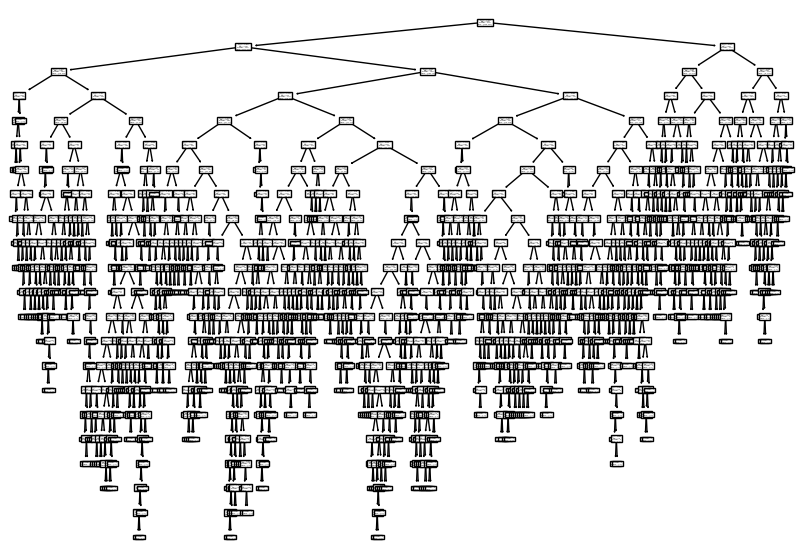

In [12]:
# plot_tree()로 그림으로 출력

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

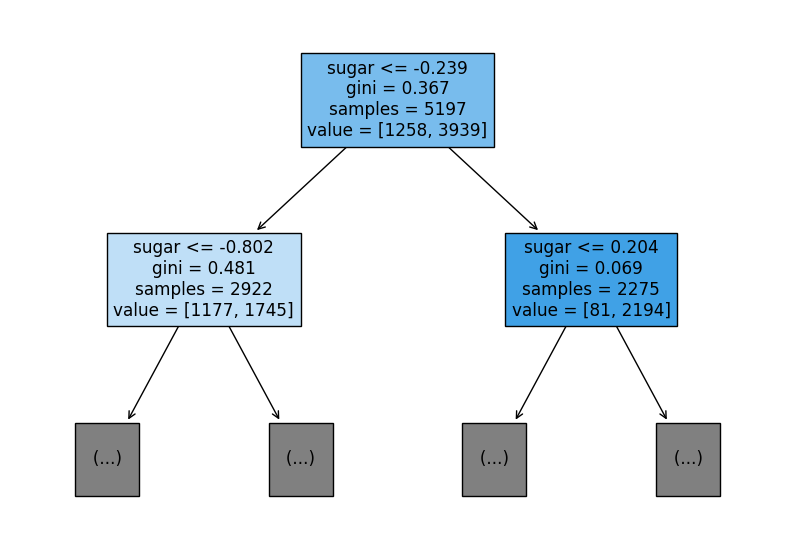

In [13]:
# 트리의 깊이를 제한해서 출력
# max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그림
# feature_names 매개변수에 특성의 이름을 전달

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [14]:
# 가지치기: 자라날 수 있는 트리의 최대 깊이를 지정

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


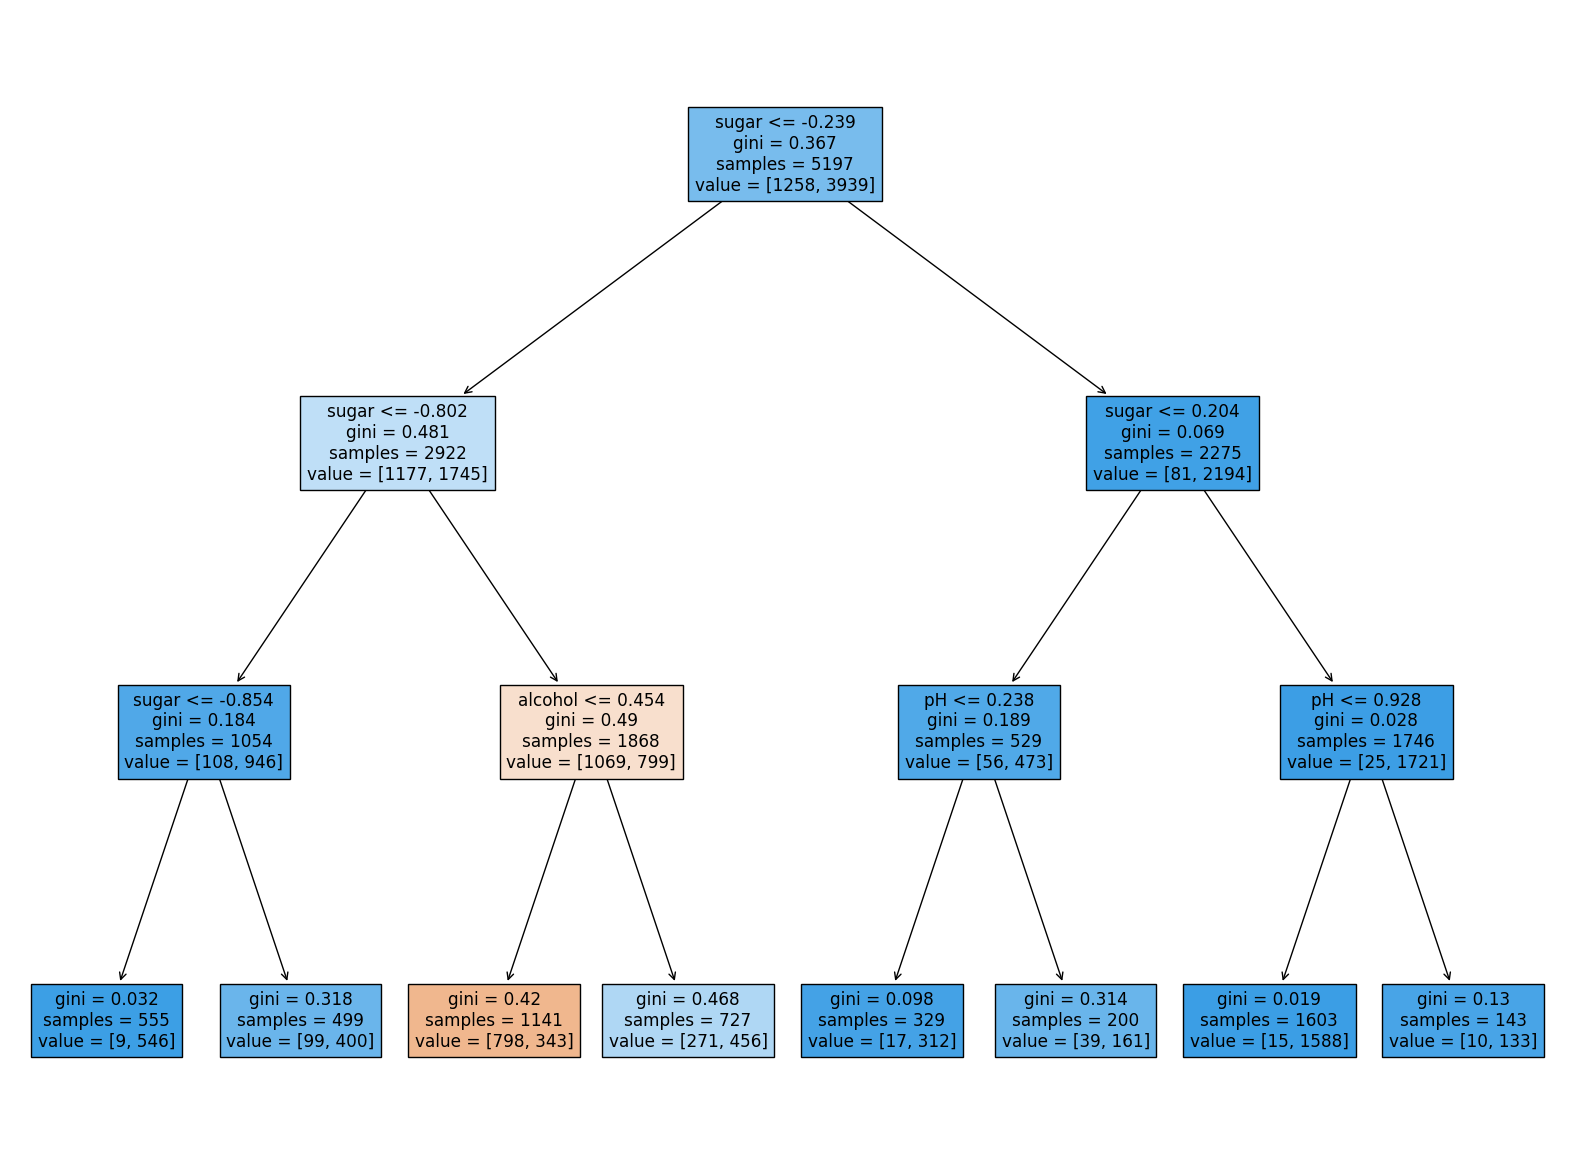

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


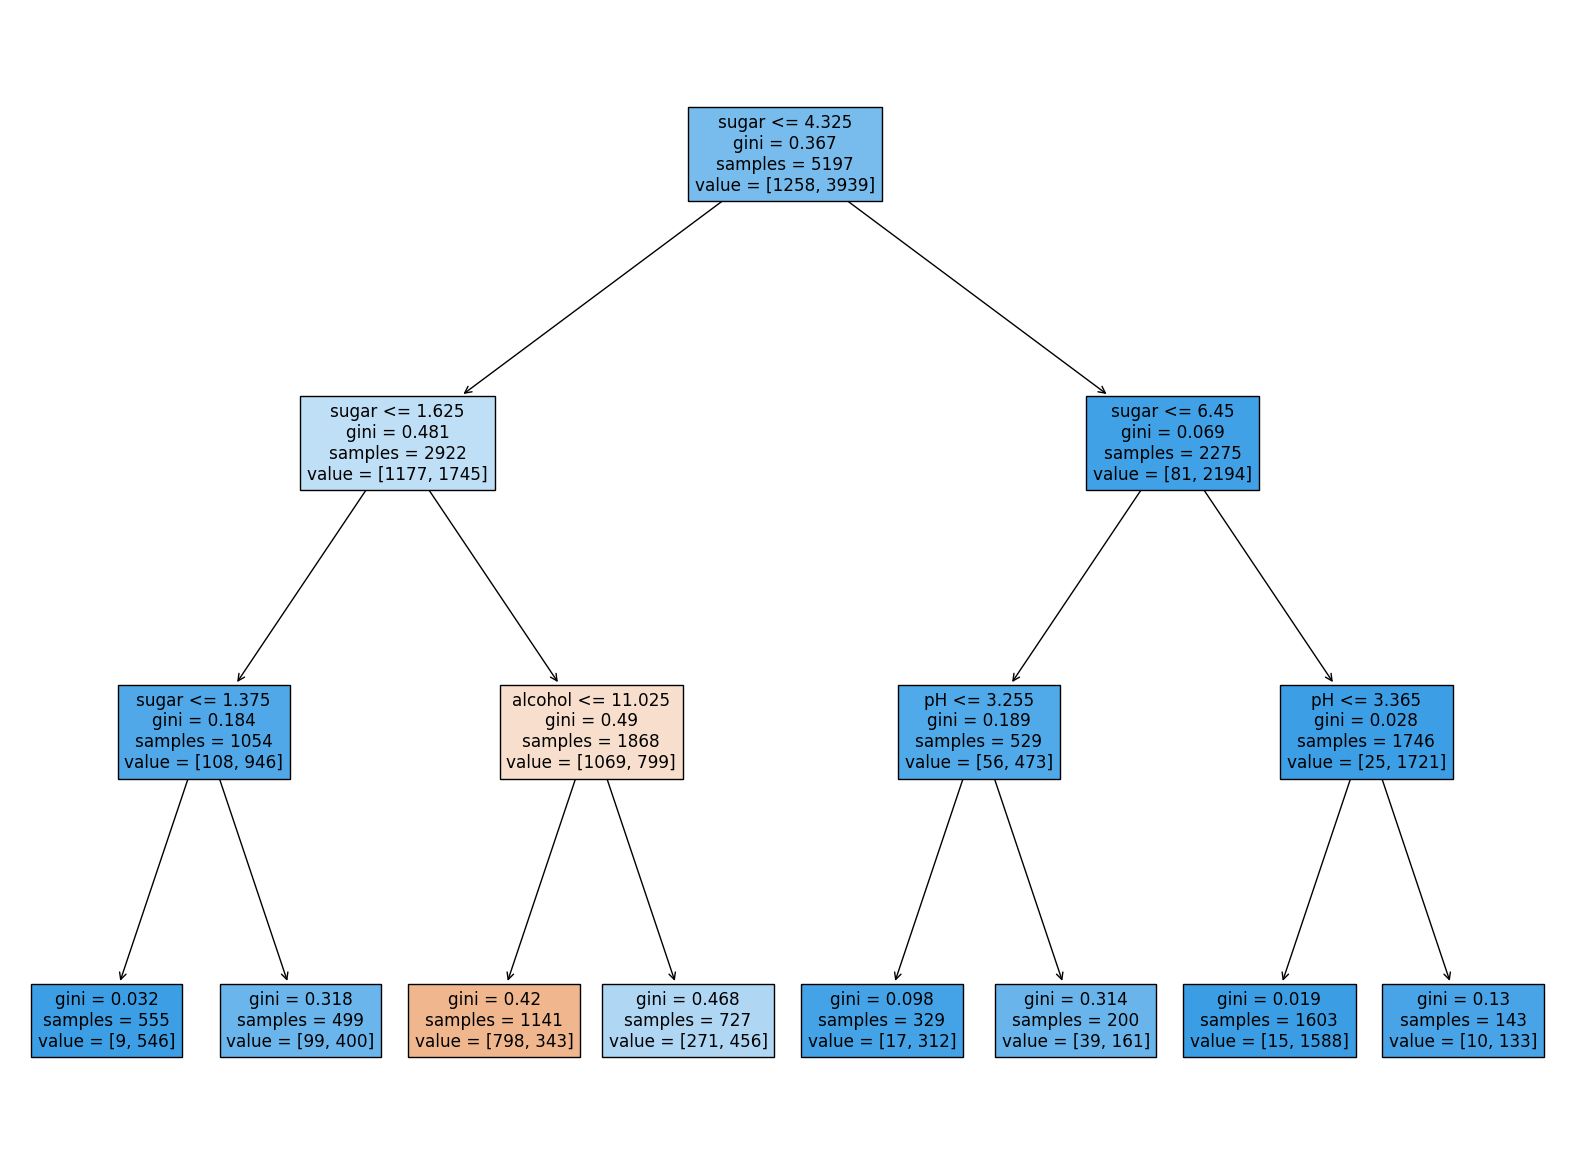

In [17]:
# 당도가 1.625 이하인 와인 중 알콜 도수가 11.025 이하인 것이 레드 와인

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

In [18]:
# 특성 중요도: Decision Tree에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값 (당도 > 알콜> pH)
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# Cross Validation & Grid Search

In [70]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [71]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [72]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [73]:
# train_input과 train_target을 다시 train_test_split()함수에 넣어 훈련세트 sub_input, sub_target과 검증세트 val_input, val_target을 만듦
# train_input의 약 20%를 val_input으로 만듦
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [74]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [76]:
# Cross validation(교차 검증): 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복하고 이 점수를 평균내어 최종 검증 점수를 얻음
# 평가할 모델 객체를 첫번째 매개변수로 전달하고 훈련세트 전체를 함수에 전달함
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

# fit_time, score_time, test_score 에서 배열의 의미 : 각 fold에서의 소요 시간과 정확도
# 이때의 정확도는 test_accuracy? test_predict? test_recall?

{'fit_time': array([0.01084471, 0.00904775, 0.00634074, 0.00618839, 0.00664496]), 'score_time': array([0.00153375, 0.00114036, 0.00083375, 0.00083971, 0.00187159]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [77]:
# 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있음
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [78]:
# 교차 검증을 할 때 훈련 세트를 섞으려면 splitter(분할기)를 지정해야 함
# 주로 회귀모델은 KFold 분할기, 분류모델은 StratifiedKFold 사용
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

# variation of k-fold cross-validation that ensures each fold maintains the same class distribution as the original dataset, which is especially useful for imbalanced datasets

0.855300214703487


In [79]:
# 훈련 세트를 섞은 후 10-폴드 교차 검증 수행하는 방법
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

# 만약 섞지 않으면 그냥 순서대로 fold 덩어리 나누기?

0.8574181117533719


In [80]:
# GridSearchCV 클래스는 하이퍼파라미터 탐색과 교차 검증을 한번에 수행함
# Decision Tree 모델에서 min_impurity_decrease 매개변수의 최적값 찾기
# 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만듦, 0.0001부터 0.0005까지 0.0001씩 증가하는 5개의 값 시도
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [81]:
# 탐색 대상 모델과 params 변수를 전달하여 그리드 서치 객체를 만듦
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

# n_jobs parameter = 1
# grid search will use all available CPU cores to perform the computation in parallel
# speed up the grid search process significantly, especially for large datasets or complex models.

In [82]:
gs.fit(train_input, train_target)

# search the hyperparameter grid and return the best model with the optimal hyperparameters

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [83]:
# 그리드 서치는 훈련이 끝나면 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련함
# 이 모델은 gs 객체의 best_estimator_ 속성에 저장되어 있음
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [84]:
# 그리드 서치로 찾은 최적의 매개변수를 best_params_ 속성에 저장되어 있음
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [85]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_reults_ 속성의 mean_test_score 키에 저장되어 있음
print(gs.cv_results_['mean_test_score'])
pd.DataFrame(gs.cv_results_)

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007303,0.000656,0.001532,0.000243,0.0001,{'min_impurity_decrease': 0.0001},0.869231,0.868269,0.882579,0.867180,0.853705,0.868193,0.009154,1
1,0.009046,0.004697,0.001300,0.000565,0.0002,{'min_impurity_decrease': 0.0002},0.871154,0.863462,0.876805,0.854668,0.856593,0.864536,0.008437,5
2,0.006051,0.000507,0.001394,0.000580,0.0003,{'min_impurity_decrease': 0.0003},0.869231,0.859615,0.875842,0.850818,0.869105,0.864922,0.008745,4
3,0.006358,0.001639,0.001065,0.000127,0.0004,{'min_impurity_decrease': 0.0004},0.869231,0.863462,0.881617,0.848893,0.875842,0.867809,0.011260,2
4,0.004874,0.000256,0.000928,0.000044,0.0005,{'min_impurity_decrease': 0.0005},0.865385,0.869231,0.882579,0.849856,0.871030,0.867616,0.010570,3


In [86]:
# argmax() 함수를 사용해 가장 큰 값의 인덱스 추출
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [87]:
# np.arange()함수는 첫번째 매개 변수 값에서 시작해 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만듦, 두번째 매개변수는 포함 x
# range()도 비슷하지만 정수만 사용 가능
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [88]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [89]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [90]:
print(np.max(gs.cv_results_['mean_test_score']))
pd.DataFrame(gs.cv_results_)

0.8683865773302731


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005003,0.000268,0.001157,0.000158,5,0.0001,2,"{'max_depth': 5, 'min_impurity_decrease': 0.00...",0.847115,0.863462,0.880654,0.836381,0.861405,0.857804,0.015102,1331
1,0.005031,0.000715,0.001076,0.000091,5,0.0001,12,"{'max_depth': 5, 'min_impurity_decrease': 0.00...",0.847115,0.863462,0.880654,0.837344,0.861405,0.857996,0.014831,1323
2,0.004827,0.000188,0.001212,0.000221,5,0.0001,22,"{'max_depth': 5, 'min_impurity_decrease': 0.00...",0.847115,0.863462,0.880654,0.837344,0.861405,0.857996,0.014831,1323
3,0.005022,0.000589,0.001397,0.000780,5,0.0001,32,"{'max_depth': 5, 'min_impurity_decrease': 0.00...",0.847115,0.863462,0.879692,0.837344,0.860443,0.857611,0.014497,1335
4,0.004752,0.000158,0.001390,0.000387,5,0.0001,42,"{'max_depth': 5, 'min_impurity_decrease': 0.00...",0.847115,0.863462,0.879692,0.837344,0.860443,0.857611,0.014497,1335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.004596,0.000131,0.000896,0.000048,19,0.0009,52,"{'max_depth': 19, 'min_impurity_decrease': 0.0...",0.852885,0.870192,0.883542,0.849856,0.852743,0.861843,0.013018,749
1346,0.004865,0.000464,0.001013,0.000114,19,0.0009,62,"{'max_depth': 19, 'min_impurity_decrease': 0.0...",0.852885,0.870192,0.880654,0.849856,0.852743,0.861266,0.012072,1024
1347,0.004894,0.000554,0.000962,0.000120,19,0.0009,72,"{'max_depth': 19, 'min_impurity_decrease': 0.0...",0.852885,0.870192,0.880654,0.849856,0.852743,0.861266,0.012072,1024
1348,0.004639,0.000084,0.000904,0.000093,19,0.0009,82,"{'max_depth': 19, 'min_impurity_decrease': 0.0...",0.854808,0.870192,0.880654,0.849856,0.852743,0.861651,0.011827,863


In [91]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.8615384615384616


In [92]:
# 랜덤 서치: 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링 할 수 있는 확률분포 객체를 전달

from scipy.stats import uniform, randint

In [93]:
# 0에서 10사이 범위를 갖는 randint 객체를 만들고 10개의 숫자 샘플링
rgen = randint(0,10)
rgen.rvs(10)

array([2, 6, 2, 5, 8, 1, 2, 9, 0, 4])

In [94]:
# 1000개로 샘플링 숫자를 늘려 각 숫자의 개수 세어보기
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([109, 106,  94,  89, 112, 111,  78, 106,  98,  97]))

In [95]:
# randint는 정숫값, uniform은 실숫값을 뽑음
ugen = uniform(0,1)
ugen.rvs(10)

array([0.12292344, 0.61624824, 0.46380346, 0.29660791, 0.95651851,
       0.55904703, 0.43107066, 0.64022941, 0.57313581, 0.12504786])

In [96]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25),
          }

In [97]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d206a798a90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d206a799210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d206a79a740>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d206a79b730>},
                   random_state=42)

In [98]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [99]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [100]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# Ensemble

In [106]:
# 랜덤 포레스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [107]:
# return_train_score=True로 하여 훈련 세트에 대한 점수도 같이 반환(과대적합 파악에 용이)
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [108]:
# 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [109]:
# 자체적으로 모델을 평가하는 oob 점수 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

# oob 점수 : 모델의 일반화 성능 이해하기 위해 out-of-bag sample 사용 여부 출력??
# n_jobs : 모델 피팅을 위해 사용하는 job의 개수 출력 ( -1인 경우, 모든 cpu 사용하여 학습 과정 speed up)


rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [110]:
# 엑스트라 트리
# 랜덤포레스트와 유사하나 부트스트랩 샘플을 사용하지 않고 각 결정 트리를 만들 때 전체 훈련 세트를 사용함
# 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 뿐할함
# 특성을 무작위로 분할한다면 성능이 낮아이지만 많은 트리를 앙상블 하기에 오버피팅을 막고 검증 세트의 점수를 높이는 효과가 있음
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [111]:
# 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [112]:
# 그레디언트 부스팅
# 깊이가 얕은 결정트리를 사용하기에 오버피팅에 강하고 높은 일반화 성능
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [113]:
# 학습률을 증가시키고 트리의 개수를 늘리면 성능이 향상됨
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
# n_estimators : # of decision trees
# learning_rate : contribution of each tree to the final model
    # high : 모델의 복잡도 high, 과적합 가능성 높음

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [114]:
# 특성 중요도 출력
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [115]:
# 그레디언트 부스팅의 속도와 성능을 개선한 히스토그램 기반 그레디언트 부스팅
# 입력 특성을 256개의 구간으로 나누어 노드를 분할할 때 최적의 분할을 빠르게 찾음
from sklearn.ensemble import HistGradientBoostingClassifier

# 입력 특성을 256개의 구간으로 나누고 그 중 하나를 뗴어 놓고 누락된 값을 위해 사용
# 입력에 누락된 특성이 있더라도 전처리 하지 않아도 됨

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [116]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [117]:
# 특성 중요도 출력
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

# permutation_importance : 특성 중요도를 출력하는 도구
# target label을 그대로 둔 채로 모델의 성능 평가

[0.05969231 0.20238462 0.049     ]


In [118]:
hgb.score(test_input, test_target)

0.8723076923076923

In [119]:
# XGBoost
# tree_method 매개변수를 'hist'로 지정하여 히스토그램 기반 그레디언트 부스팅 가용
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#과제

1. 하단 셀에서 lightGBM 구현하기 (상단 Ensemble 셀 모두 실행 후 진행)
2. 그리드 서치, 랜덤 서치 각각 어떤 상황에서 효율적인지 설명
3. 다른 데이터셋으로 Decision Tree regression task 진행해보기
  - 원하는 데이터셋을 사용해도 괜찮고, 올려둔 bike_data 사용해도 괜찮음
  - 직접 구현해보는 것이 어렵다면 'bike sharing data decision tree regressor' 키워드로 검색 후 참고


## 과제1

## <font color = 'royalblue'> K-Fold Cross Validation Flow Chart </font>
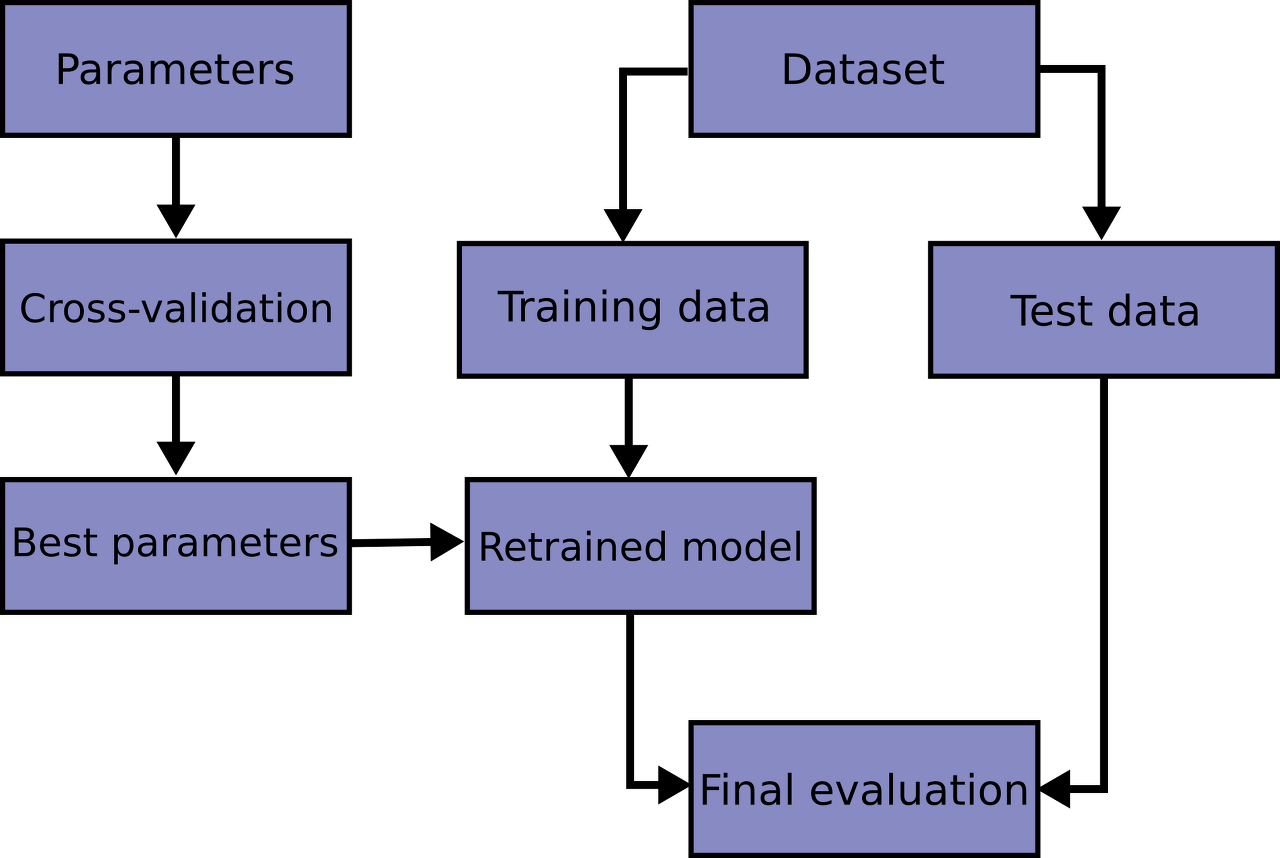

In [129]:
# 필요한 라이브러리 불러오기 (lightgbm)

from lightgbm import LGBMClassifier

In [130]:
# 교차검증 시행하기

# 1. lightgbm 객체 만들기
lightgbm = LGBMClassifier(n_estimators = 500, learning_rate = 0.2, random_state = 42)
'''
n_estimators : 의사 결정 나무의 개수
learning_rate : 최종 모델에 각 트리의 기여도 => high : 모델의 복잡도 high, 과적합 가능성 high
'''

# 2. 교차검증 시행 (score 변수에는 각 fold에서의 score(fit_time, score_time, test_accuracy...) 저장)
scores = cross_validate(lightgbm, train_input, train_target, return_train_score = True, n_jobs = -1)

# 3. 결과 확인
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
pd.DataFrame(scores)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.9974503966084433 0.879739209298882


,fit_time,score_time,test_score,train_score
0,0.397012,0.053172,0.869231,0.997113
1,0.379021,0.049876,0.885577,0.996632
2,0.388687,0.049931,0.896054,0.998076
3,0.370320,0.054211,0.874880,0.997595
4,0.349893,0.038353,0.872955,0.997835


In [131]:
# 모델 학습하기

lightgbm.fit(train_input, train_target)

# 특성 중요도 평가
result = permutation_importance(lightgbm, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)
## permutation_importance : 특성 중요도를 출력하는 도구
## target label을 그대로 둔 채로 모델의 성능 평가

[0.07223077 0.21453846 0.07092308]


In [132]:
# 특성 중요도 출력
lightgbm.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [133]:
# Test score
from sklearn.metrics import accuracy_score, f1_score

print("LGB Accuracy for test data : {:.3f}".format(accuracy_score(test_target, lightgbm.predict(test_input))))
print("LGB F1 score for test data : {:.3f}".format(f1_score(test_target, lightgbm.predict(test_input))))

LGB Accuracy for test data : 0.873
LGB F1 score for test data : 0.914


## 과제2
##### Grid Search
- 방법 : 하이퍼파리미터를 일정 간격으로 변경하며 최적의 파라미터를 찾아가는 기법
- 한계 : 최적의 해를 찾을 수 있다는 보장 없음. 동작 방식이 비효율적. (굳이 탐색하지 않아도 되는 구간까지 탐색)

##### Random Search
- 방법 : 주어진 구간 안에서 랜덤으로 하이퍼파라미터를 선정하는 과정을 통해 최적해를 찾음
- 장점 : 그리드 서치에서 선정되지 않은 하이퍼파라미터에 대해서도 탐색 가능 (최적 해를 확률적으로 더 빨리 찾을 수 있음) / Grid Search보다 속도가 빠르지만 최적해가 아닐 수 있음 / 샘플 수가 많다면 Random Sampling 통해 최적해 찾을 가능성 높아짐

##### 언제 Random Search가 Grid Search에 비해 선호되는가?
- 가능한 하이퍼파라미터의 범위가 넓을때! 어떤 하이퍼파라미터가 잘 작동할지에 대한 감이나 아이디어가 없을때 랜덤서치를 수행함.

cf. 본 문제의 경우, Random Search와 Grid Search 모두 유사한 정확도를 도출하였다.

##### 출처
https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

https://velog.io/@crosstar1228/MLHyperparameter-tuning-%EA%B8%B0%EB%B2%95%EC%9D%98-3%EA%B0%80%EC%A7%80GridSearch-RandomSearch-Bayesian-Optimization

https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html



In [134]:
# Light GBM Grid Search

params={'max_depth':[2,5,8],
        'n_estimators':[100,500,1000],
        'learning_rate':[1e-3,0.01,0.1,1,10]}

gs = GridSearchCV(lightgbm, params, scoring='f1')
gs.fit(train_input, train_target)

GridSearchCV(estimator=LGBMClassifier(learning_rate=0.2, n_estimators=500,
                                      random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 5, 8],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1')

In [135]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}

In [136]:
gs.best_score_

0.9232156385712542

In [137]:
print("LightGBM with Hyperparameter Tuning using Grid Search")
print("Accuracy score : {:.4f}, F1 score : {:.4f}".format(accuracy_score(test_target, gs.predict(test_input)), f1_score(test_target, gs.predict(test_input))))

LightGBM with Hyperparameter Tuning
Accuracy score : 0.8662, F1 score : 0.9094


In [138]:
# Light GMB Random Search

from scipy.stats import uniform, randint

params = {'max_depth': randint(2, 9),
          'n_estimators': randint(100, 1001),
          'learning_rate': uniform(0.001, 10.0),
          }

In [139]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(lightgbm, params, n_iter=100, n_jobs=-1, random_state=42, scoring='f1')
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=LGBMClassifier(learning_rate=0.2, n_estimators=500,
                                            random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d206e3efb80>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d2075d1af80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d206a67da20>},
                   random_state=42, scoring='f1')

In [140]:
rs.best_params_

{'learning_rate': 0.40533589538431347, 'max_depth': 8, 'n_estimators': 114}

In [141]:
rs.best_score_

0.921896256957563

In [142]:
print("LightGBM with Hyperparameter Tuning using Randomized Search")
print("Accuracy score : {:.4f}, F1 score : {:.4f}".format(accuracy_score(test_target, rs.predict(test_input)), f1_score(test_target, rs.predict(test_input))))

LightGBM with Hyperparameter Tuning using Randomized Search
Accuracy score : 0.8646, F1 score : 0.9082


## 과제3

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [148]:
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.head()

## <font color = 'royalblue'> Data Pre-Processing </font>

### Original Dataset Column 분석
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : whether day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [151]:
# 결측치 확인하기
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [154]:
# unique value 확인하기
hour_df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [156]:
# column명 바꾸기
new_name = {'weathersit':'weather',
            'yr':'year',
            'mnth':'month',
            'hr':'hour',
            'hum':'humidity',
            'cnt':'count'}
hour_df.rename(columns = new_name, inplace = True)
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [157]:
# 불필요한 칼럼 제거하기

no_need = ['instant', 'dteday', 'year']
hour_df.drop(columns = no_need, inplace = True)

In [158]:
# 시각화를 위해 int column을 categorical column으로 변환하기

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    hour_df[col] = hour_df[col].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


[Text(0.5, 1.0, 'Count of bikes during Weekdays and Weekends')]

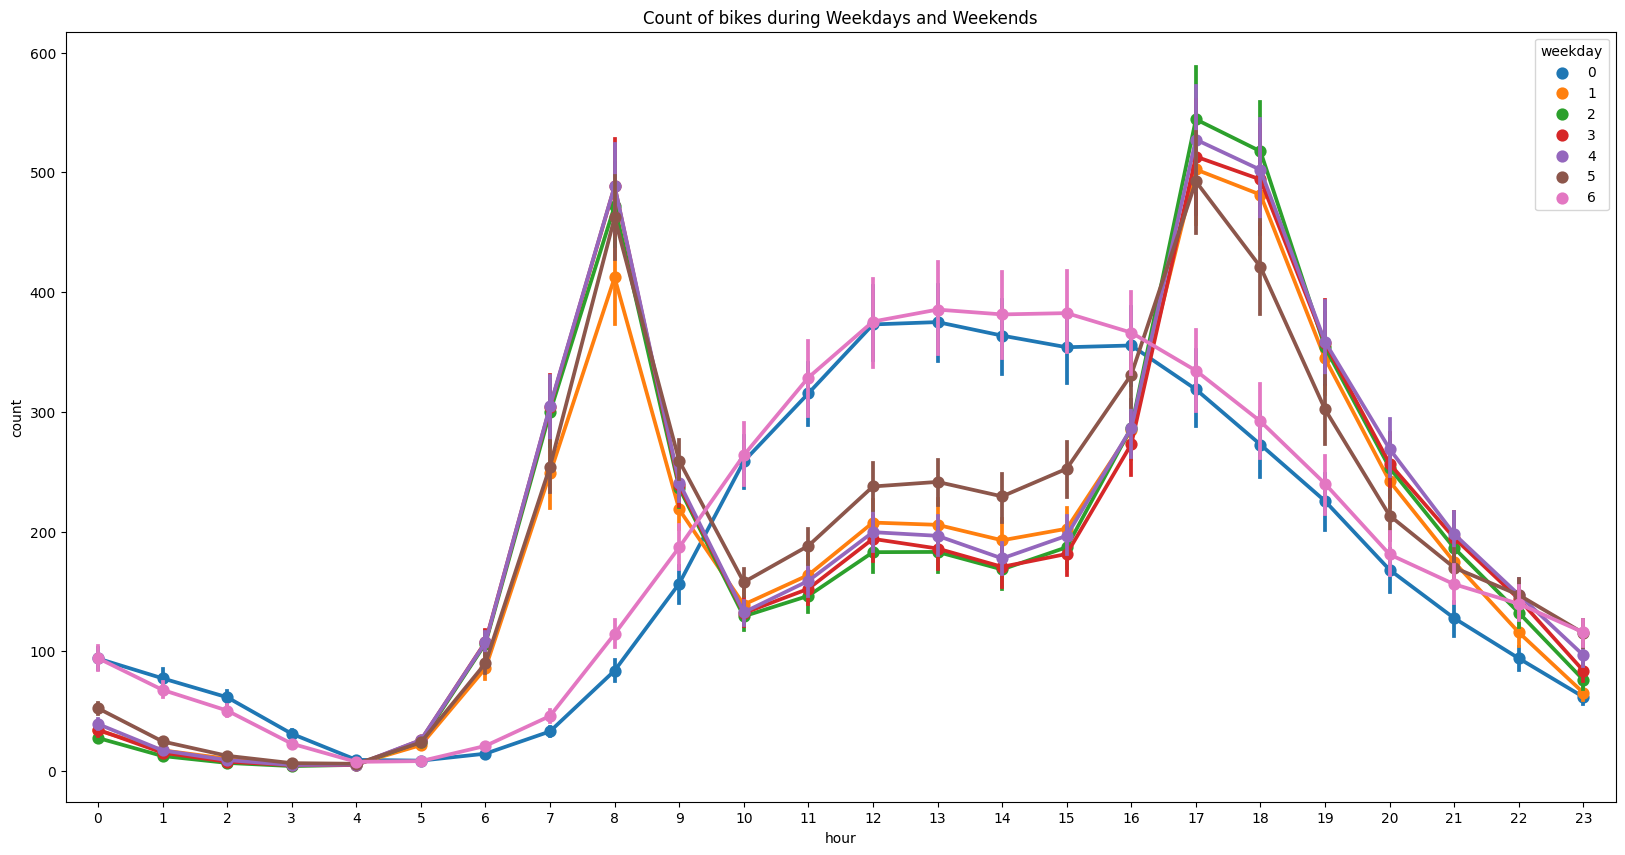

In [159]:
### EDA

import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlib figure 및 축 생성
fig, ax = plt.subplots(figsize = (20,10))
# Seaborn Pointplot function 이용 시간에 따른 자전거의 수
sns.pointplot(data = hour_df, x = 'hour', y = 'count', hue = 'weekday', ax = ax)
ax.set(title = 'Count of bikes during Weekdays and Weekends')

# 주중 : 출퇴근 시간에 자전거 이용수 많음
# 주말 : 오후에 자전거 이용수 많음

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered(Casual) users')]

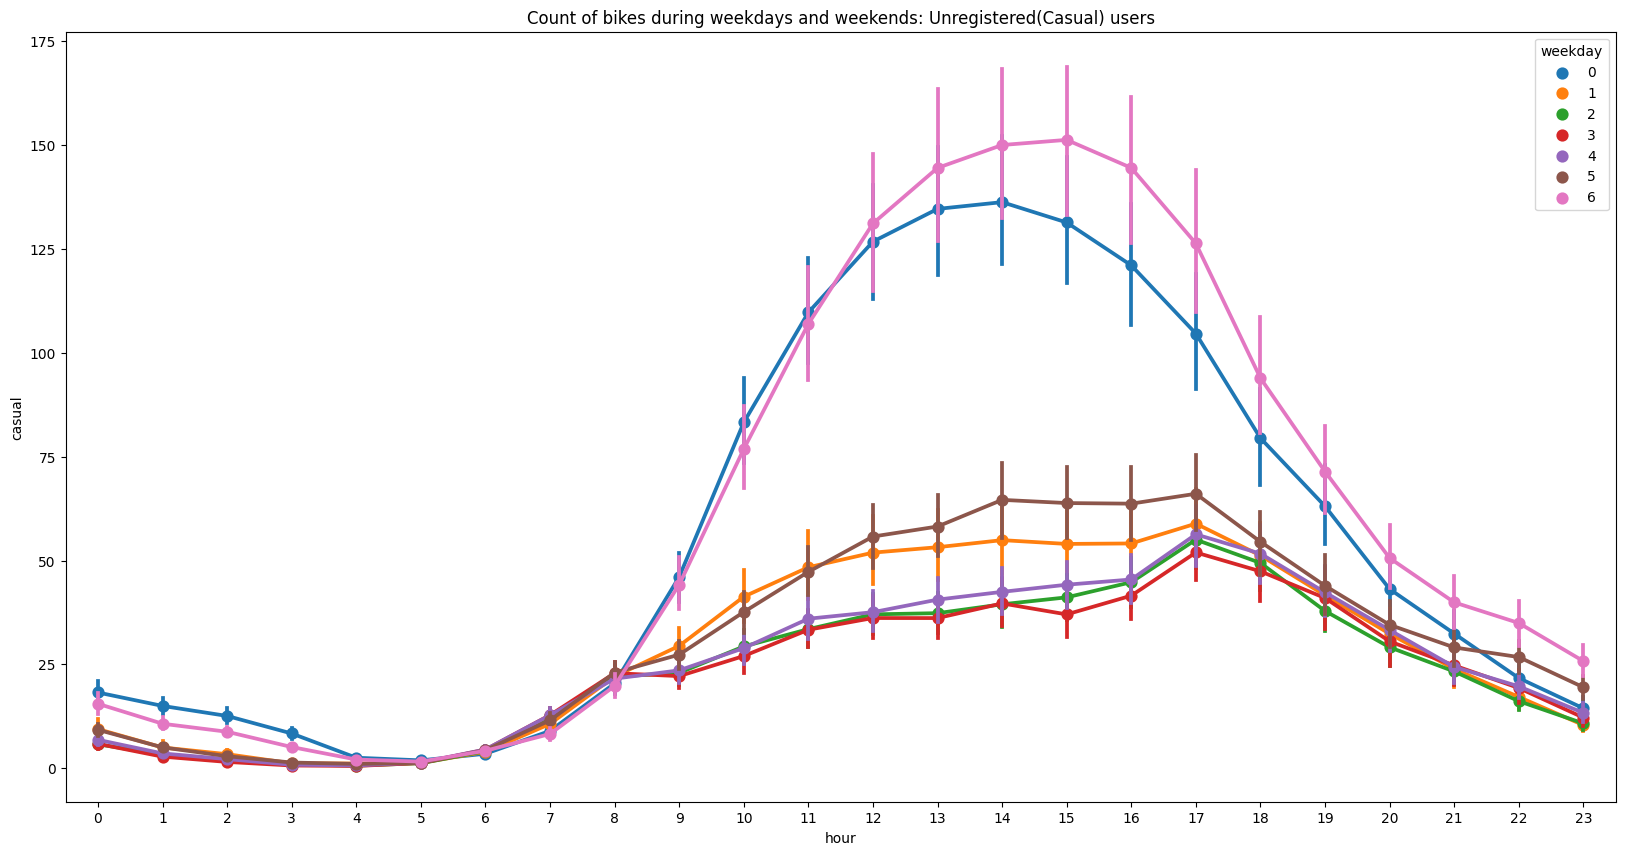

In [161]:
# Unregistered(Casual) user에 대한 count
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = hour_df, x= 'hour', y = 'casual', hue = 'weekday', ax = ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered(Casual) users')

# 주말에 unregistered user 자전거 이용수 많음

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

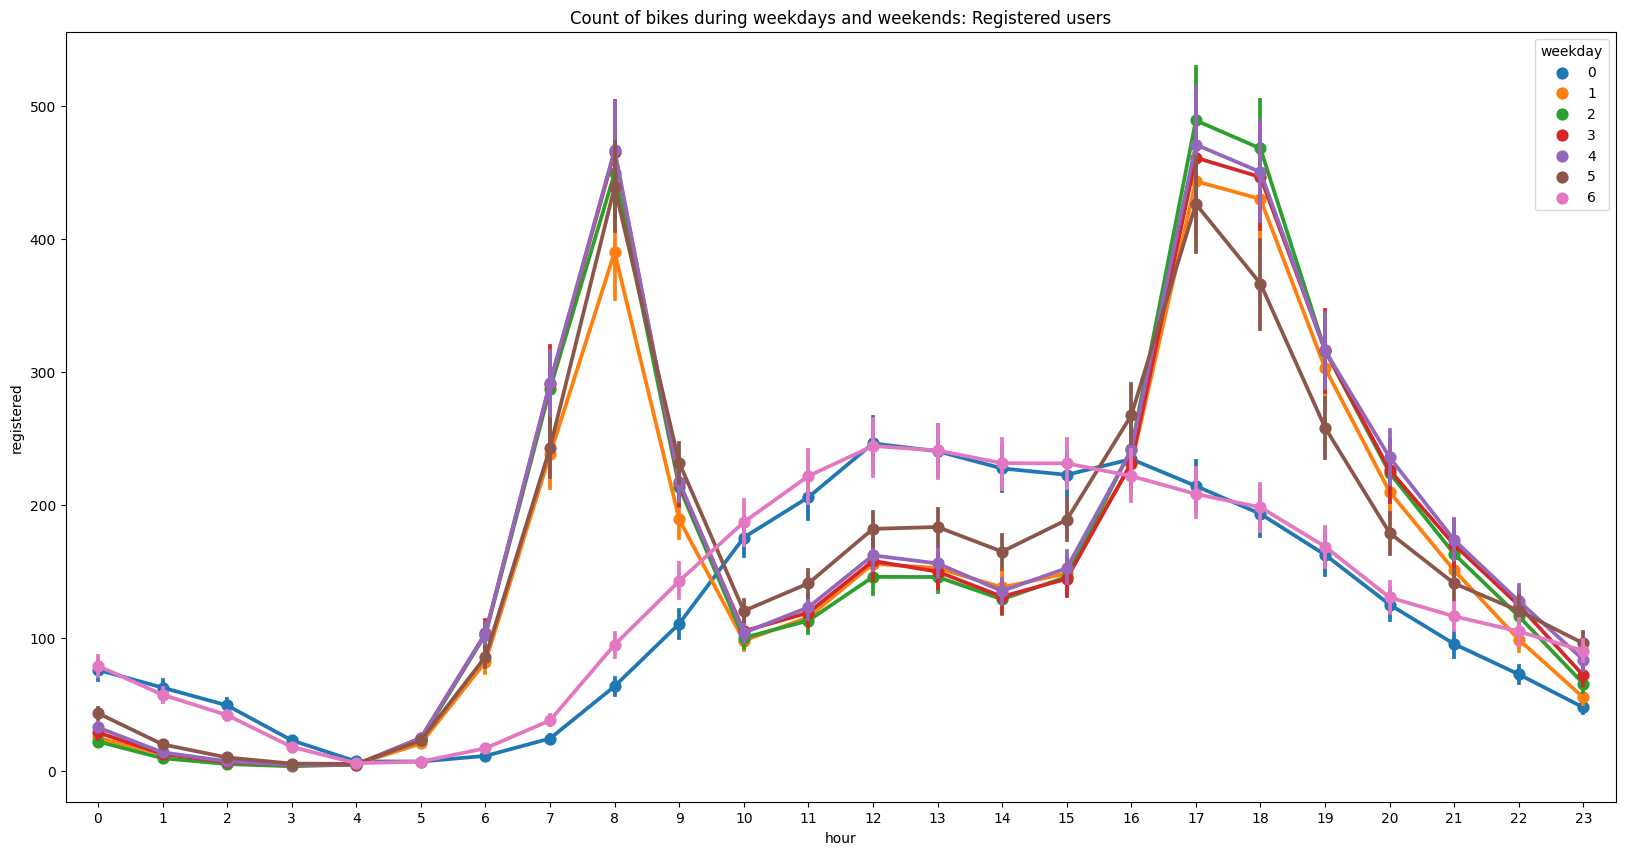

In [162]:
# Registered user에 대한 count

fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = hour_df, x = 'hour', y = 'registered', hue = 'weekday', ax = ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

# 전체 count와 비슷한 양상
# 주중 : 출퇴근 시간대에 자전거 이용수 많음
# 주말 : 오후 시간대에 자전거 이용수 많음

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

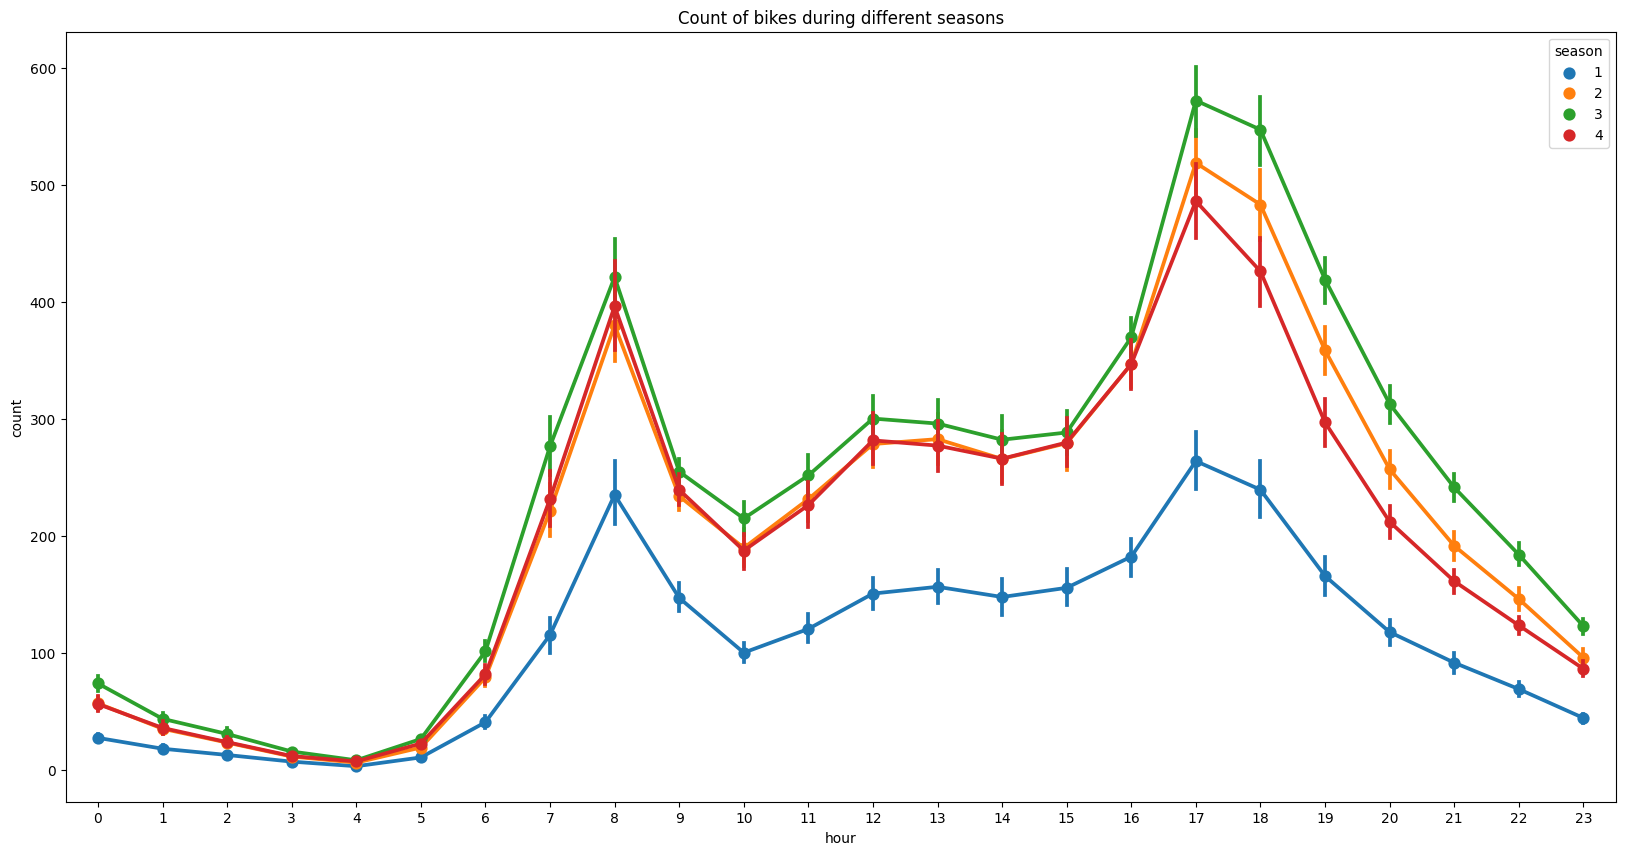

In [163]:
# 계절에 따른 자전거 count 수

fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = hour_df, x = 'hour', y = 'count', hue = 'season', ax = ax)
ax.set(title = 'Count of bikes during different seasons')

# 겨울을 제외한 계절(봄, 여름, 가을)에서 자전거 이용수 양상 유사

[Text(0.5, 1.0, 'Count of bikes during different months')]

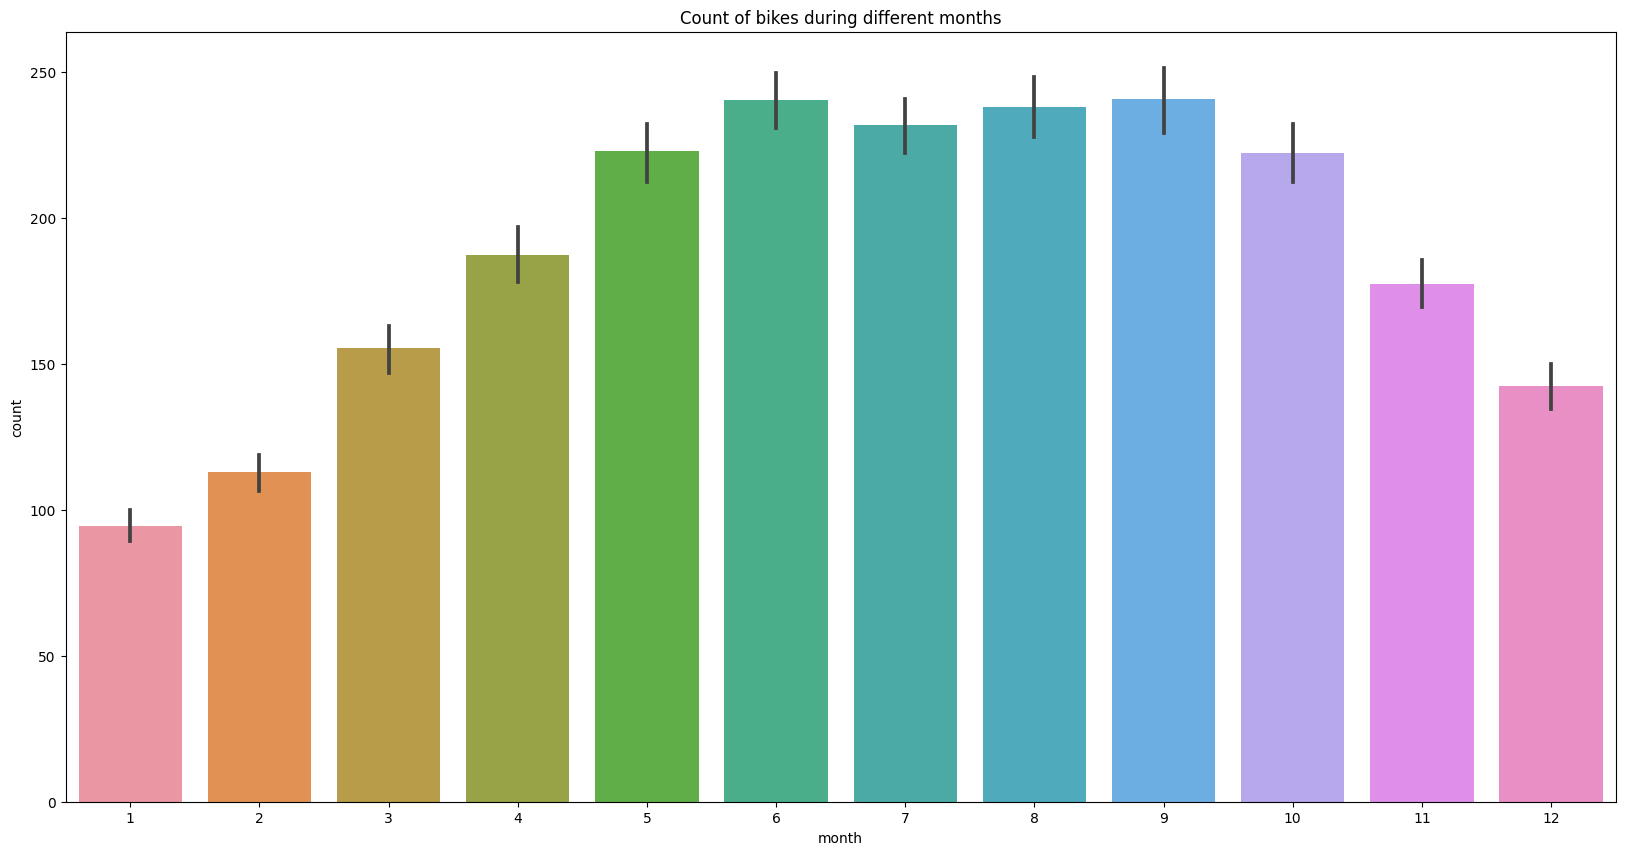

In [165]:
# 월별 자전거 count 수

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data = hour_df, x = 'month', y = 'count', ax = ax)
ax.set(title = 'Count of bikes during different months')

# 6월까지 꾸준하게 자전거 이용수 증가하다가 9월부터 감소하는 양상

[Text(0.5, 1.0, 'Count of bikes during different days')]

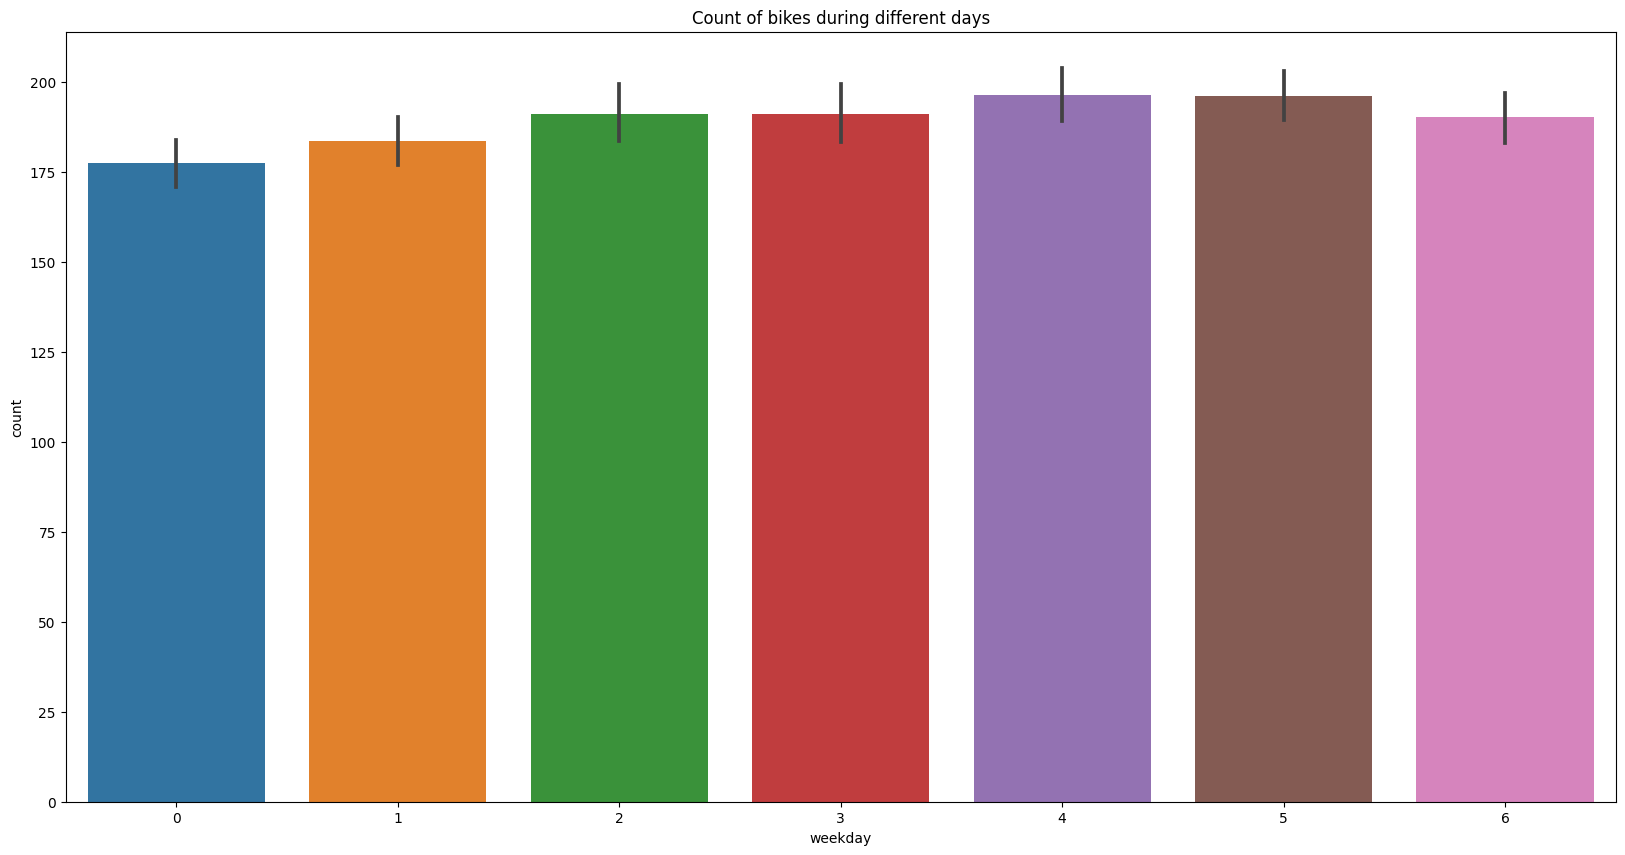

In [166]:
# 요일에 따른 자전거 count 수
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data = hour_df, x = 'weekday', y = 'count', ax = ax)
ax.set(title = 'Count of bikes during different days')

# 요일별로 자전거 이용수 비슷함

[Text(0.5, 1.0, 'Relation between humidity and users')]

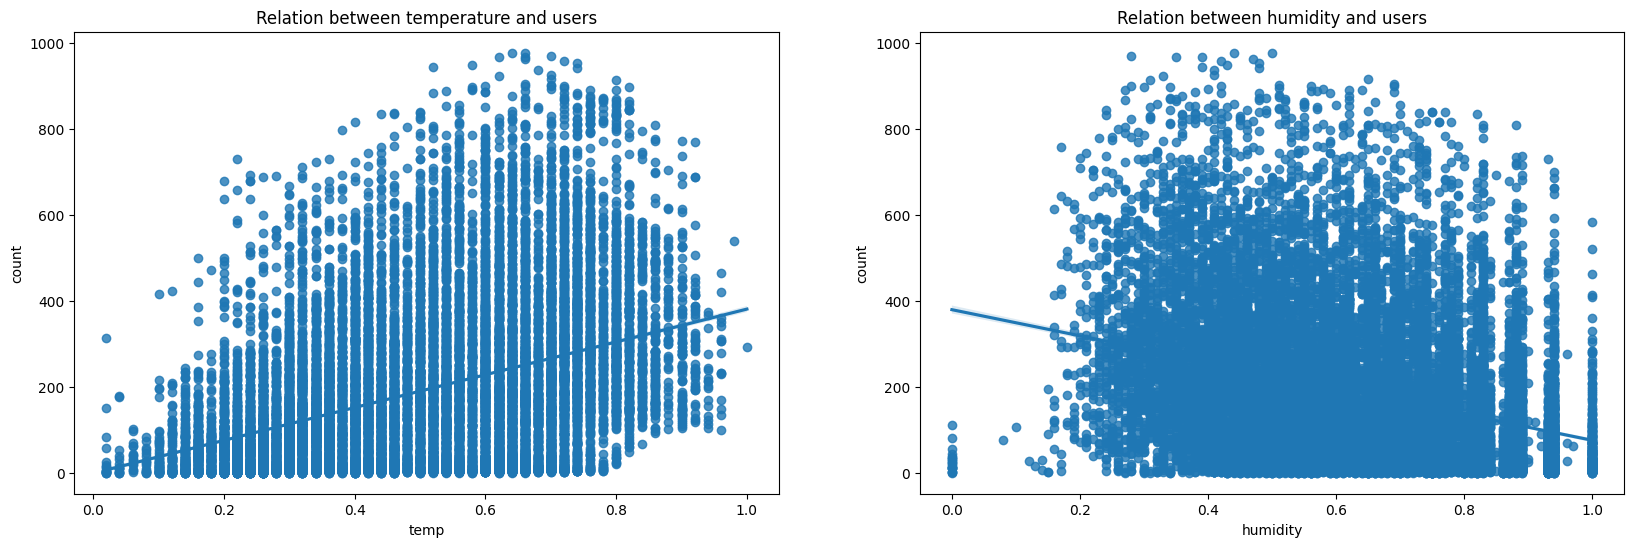

In [167]:
# 온도와 습도를 예측변인으로 자전거 이용수에 대한 회귀분석 진행

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 6))
sns.regplot(x = hour_df['temp'], y = hour_df['count'], ax = ax1)
ax1.set(title = "Relation between temperature and users")
sns.regplot(x = hour_df['humidity'], y = hour_df['count'], ax = ax2)
ax2.set(title = "Relation between humidity and users")

# 온도가 증가할수록 자전거 이용자수 증가함
# 습도가 증가할수록 자전거 이용자수 감소함

<ipython-input-168-9e01d816d05f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hour_df['count'], ax = ax1)


[Text(0.5, 1.0, 'Theoretical quantiles')]

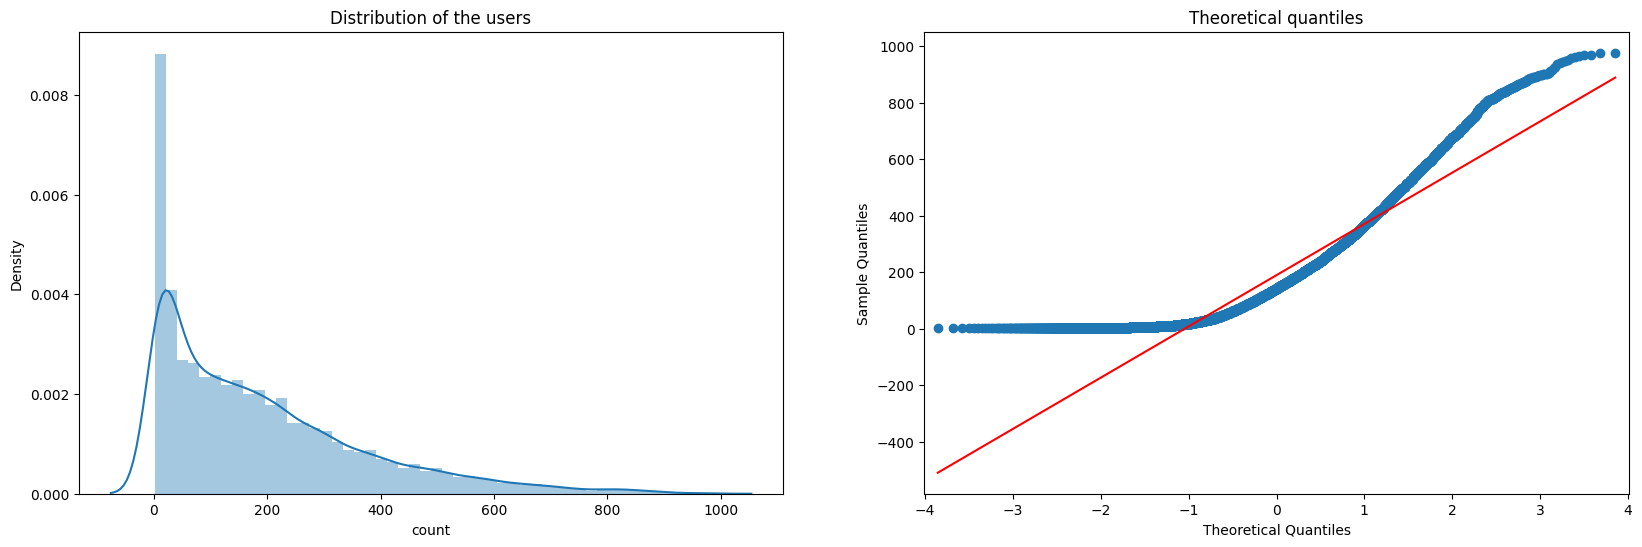

In [168]:
# 자전거 이용자수 스케일링

## qqplot : quantile-quantile plot (분위수 대조도)
## 수집 데이터를 표준 정규분포의 분위수와 비교하여 그리는 그래프
## 모집단이 정규성 따른다면 직선 형태로 그려짐

from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(hour_df['count'], ax = ax1)
ax1.set(title = 'Distribution of the users')
qqplot(hour_df['count'], ax = ax2, line = 's')
ax2.set(title = 'Theoretical quantiles')

# 유저의 분포에 불균형 심함
# 파란색의 데이터를 빨간색 선으로 스케일링해야함

<ipython-input-169-1444037dc58c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hour_df['count'], ax = ax1)


[Text(0.5, 1.0, 'Theoretical quantiles')]

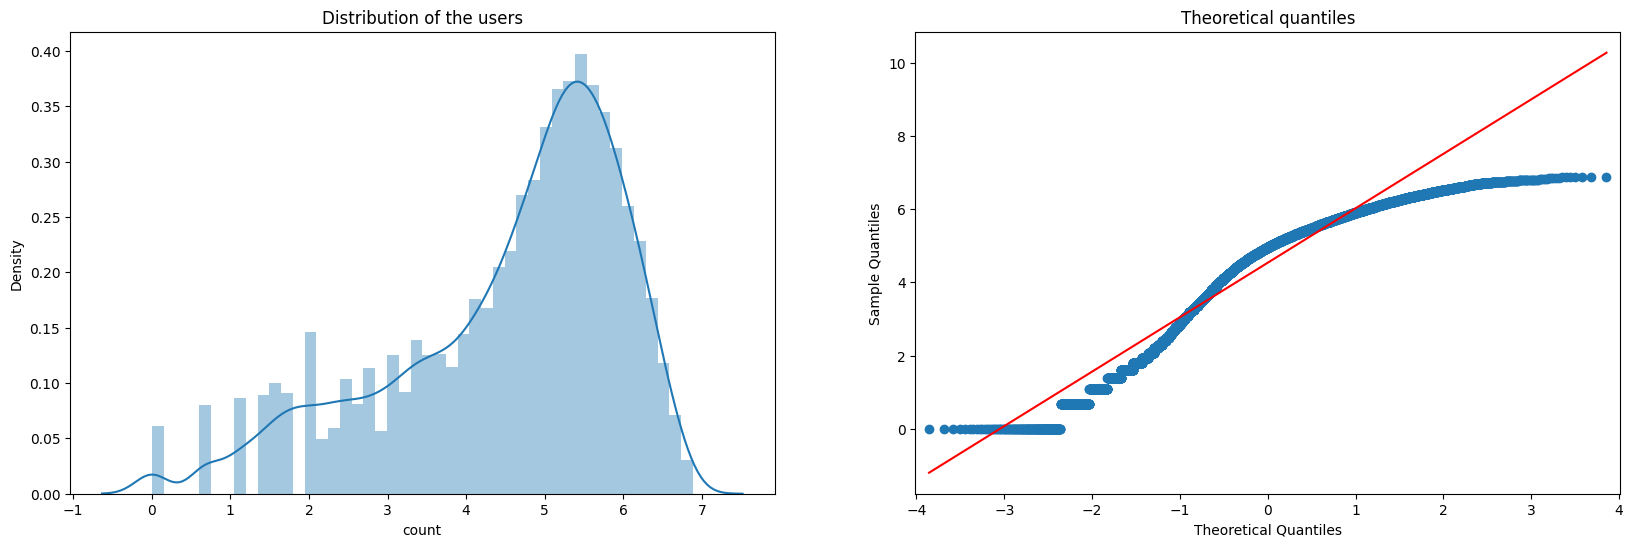

In [169]:
# 자전거 count수 로그 변환

hour_df['count'] = np.log(hour_df['count'])

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(hour_df['count'], ax = ax1)
ax1.set(title = 'Distribution of the users')
qqplot(hour_df['count'], ax = ax2, line = 's')
ax2.set(title = 'Theoretical quantiles')

# 빨간색 선으로 스케일링함


<ipython-input-170-63a6870f24eb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hour_df.corr()


<Axes: >

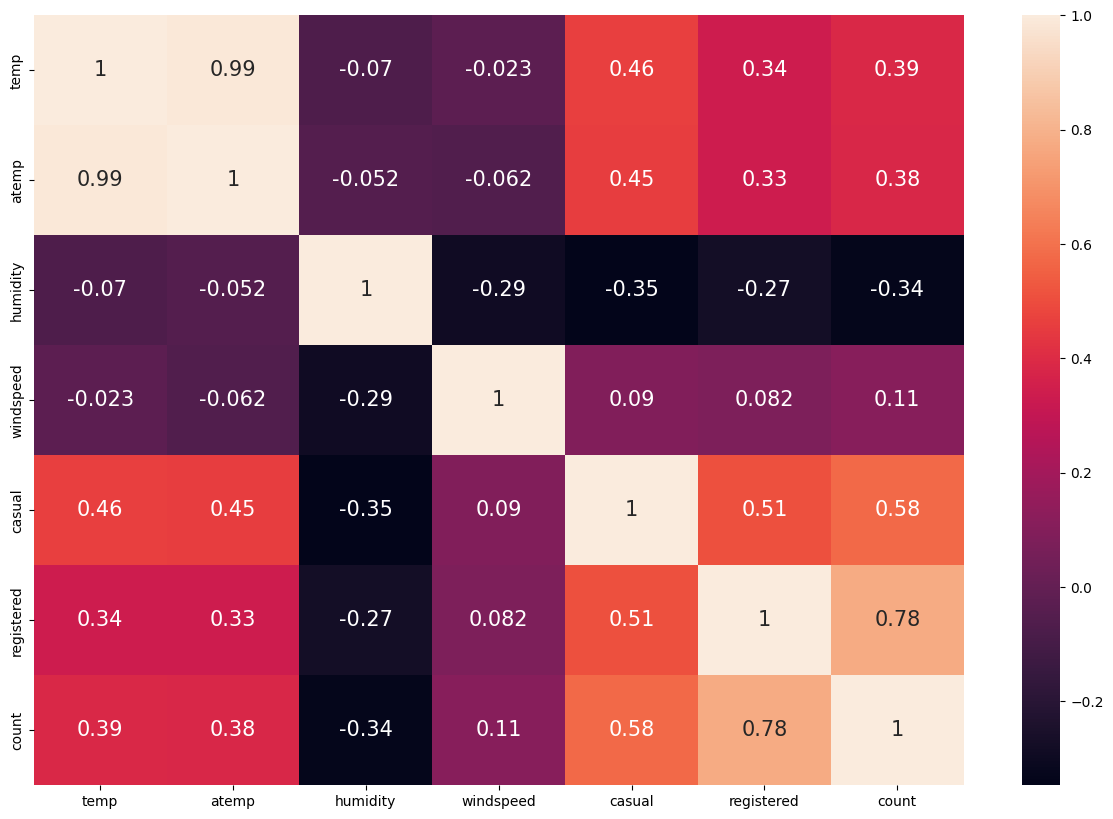

In [170]:
# 상관계수 행렬, heatmap

corr = hour_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, annot_kws = {'size':15})

# temp 변수, atemp 변수의 높은 상관
# windspeed 변수의 낮은 상관

In [171]:
# 원-핫 인코딩 : 더미 변수 만들기

pd.get_dummies(hour_df['season'], prefix = 'season', drop_first = True)
# season_2, season_3, season_4 모두 0인 경우, season_1

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [172]:
hour_df_oh = hour_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column],
                    prefix = column, drop_first = True)],
                    axis = 1)
    data = data.drop([column], axis = 1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    hour_df_oh = one_hot_encoding(hour_df_oh, col)

hour_df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## <font color = 'royalblue'> Data Split </font>

In [178]:
X = hour_df_oh.drop(columns = ['atemp', 'windspeed', 'casual', 'registered', 'count'], axis = 1)
y = hour_df_oh['count']

X.head()

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [177]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

## <font color = 'royalblue'> Model Training </font>

In [184]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dt.fit(train_X, train_y)

print(dt.score(train_X, train_y))
print(dt.score(test_X, test_y))

0.8857886456088506
0.806992283467475


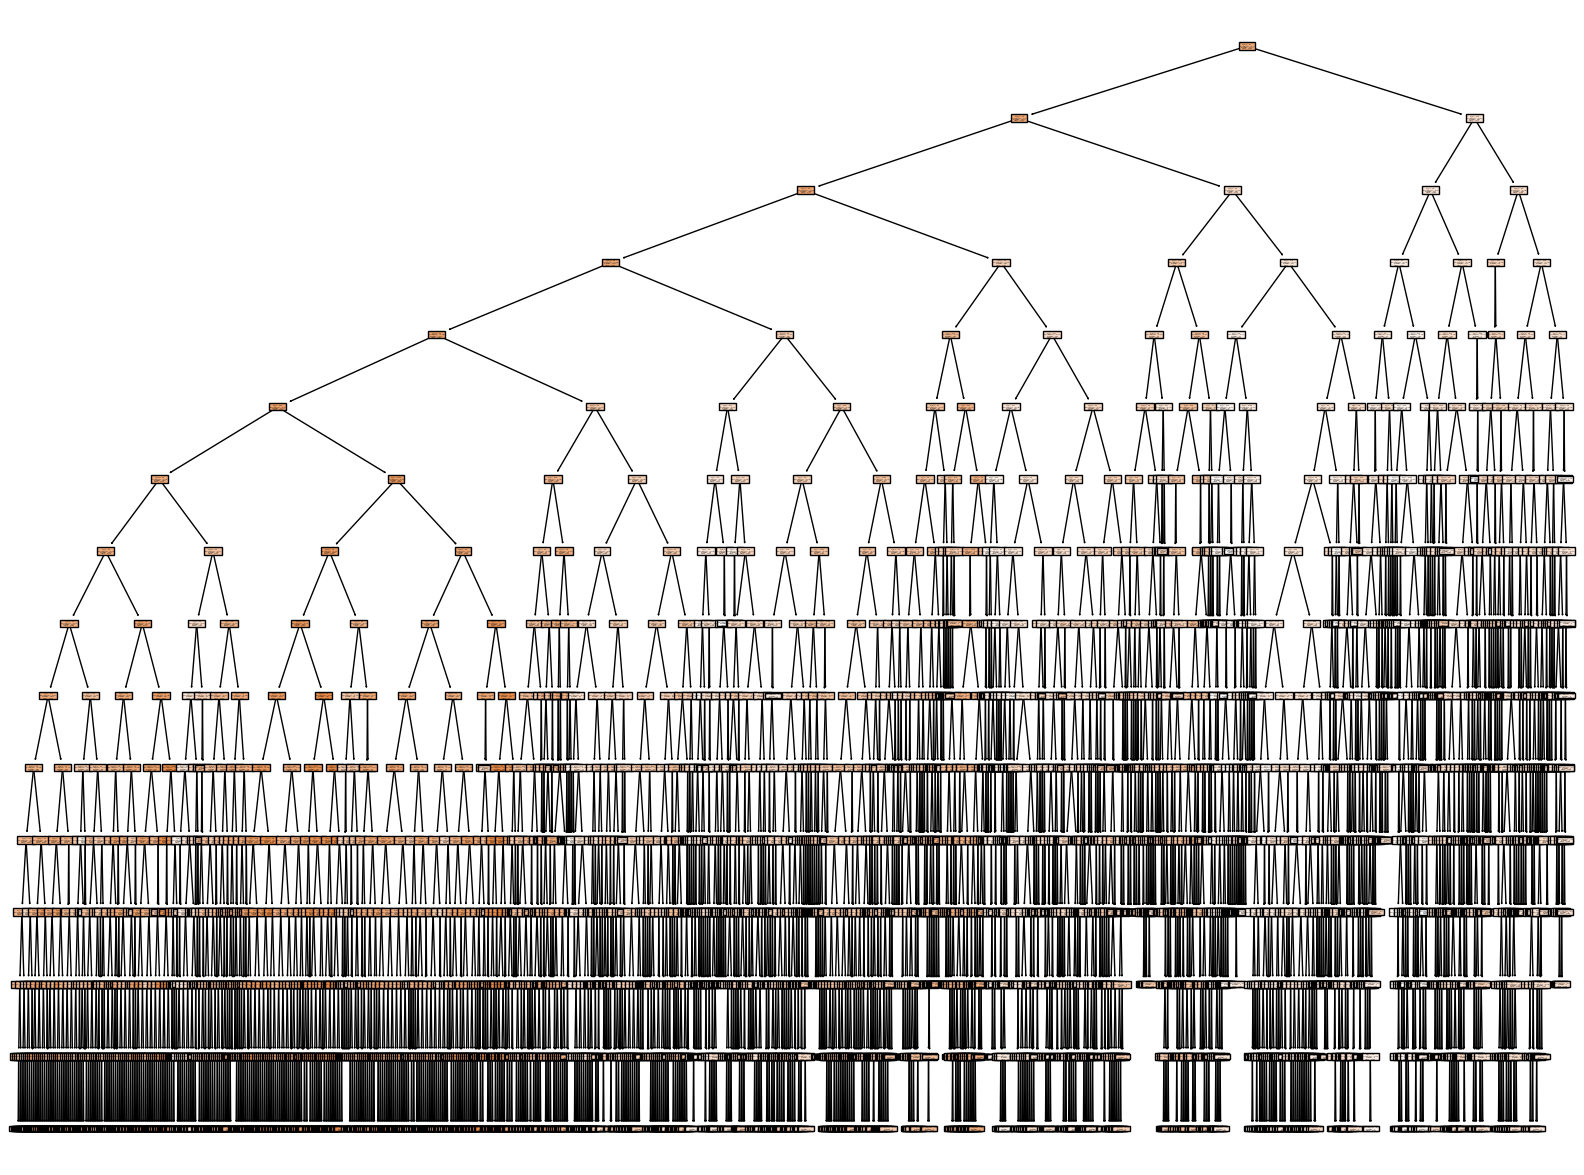

In [185]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled = True)
plt.show()

## <font color = 'royalblue'> Test Score </font>

In [188]:
from sklearn.metrics import mean_squared_error

print("Decision Tree Mean Squared Error for test data : {:.3f}".format(np.sqrt(mean_squared_error(test_y, dt.predict(test_X)))))

Decision Tree Mean Squared Error for test data : 0.646


##### 출처:
https://www.hackersrealm.net/post/bike-sharing-demand-analysis-using-python
